In [78]:
# Import the dependencies.
import pandas as pd
import numpy as np
from citipy import citipy
import random
from config import weather_api_key
import requests
import matplotlib.pyplot as plt
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [79]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(-90.000,90.000, size=1500)
longs=np.random.uniform(low=-180.0,high= 180.000, size=1500)
lats_longs=zip(lats,longs)
lats_longs

In [80]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(-90.000,90.000, size=1500)
longs=np.random.uniform(low=-180.000, high= 180.000, size=1500)
lats_longs=zip(lats,longs)
lats_longs

In [81]:
# Add the latitudes and longitudes to a list.
coordinates=list(lats_longs)


In [82]:
print(coordinates)

[(-82.27463619240714, -50.254643049533826), (33.07902781997399, -151.33518669263066), (-87.68410801314276, -4.988297523329635), (-26.42727927703784, 13.754052502343058), (31.69854391153595, 71.4118623004897), (-79.0313278624116, -75.4217240371148), (-6.37479058826608, 49.14226765125497), (63.02575780207485, 78.43105762200366), (30.401479502124374, 37.939145174710205), (-73.80051071795256, -120.6301555275806), (-40.20104698633098, 93.85348618028115), (57.914994111448635, 38.192610774881956), (-32.706693772904224, -140.03257693477295), (-55.34547531058828, 27.44660434572654), (83.64225938250459, -20.55538385689104), (-32.76223273382841, -135.39938725980127), (21.780580231404244, -157.31520100069076), (42.78386157728386, 160.43507282021056), (-12.413938047547163, -177.11334531461398), (-60.71148103517876, -36.28504676840012), (-27.728920033967746, 65.4262481713424), (81.73921627704274, 46.57040476415784), (65.30587405303021, -75.3866507444747), (-37.1338636374955, 146.8588517531917), (23.

In [83]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [84]:
print(cities)

['ushuaia', 'kahului', 'hermanus', 'luderitz', 'dullewala', 'victoria', 'tarko-sale', 'bayir', 'rikitea', 'busselton', 'novyy nekouz', 'port elizabeth', 'illoqqortoormiut', 'kailua', 'severo-kurilsk', 'vaitupu', 'mar del plata', 'mahebourg', 'belushya guba', 'iqaluit', 'wangaratta', 'butaritari', 'sabang', 'campos', 'mataura', 'punta arenas', 'atuona', 'avondale', 'new norfolk', 'porto novo', 'lebu', 'port hedland', 'vaini', 'albany', 'souillac', 'cape town', 'torbay', 'bredasdorp', 'le port', 'tuatapere', 'tuktoyaktuk', 'chokurdakh', 'sinnamary', 'victor harbor', 'vitorino freire', 'puerto ayora', 'avera', 'lukoyanov', 'clyde river', 'faanui', 'mendoza', 'kembe', 'nome', 'kaitangata', 'upernavik', 'pacific grove', 'berlevag', 'hilo', 'ponta do sol', 'belaya gora', 'saleaula', 'miles city', 'kloulklubed', 'aksha', 'yeletskiy', 'ribeira grande', 'kasongo-lunda', 'hasaki', 'bolungarvik', 'wanning', 'constitucion', 'mys shmidta', 'segezha', 'sitka', 'rawson', 'nizhneyansk', 'port alfred',

In [85]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [86]:
# Create an empty list to hold the weather data.
city_data=[]

# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count=1
set_count=1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i%50==0 and i>=50):
        set_count+=1
        record_count=1
        
    # Create endpoint URL with each city.
    city_url=url+"&q="+city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing record {record_count} of Set {set_count}| {city}")
        
    # Add 1 to the record count.
    record_count+=1
    try:
        # Parse the JSON and retrieve data.
        city_weather=requests.get(city_url).json()
        # Parse out the needed data.
        city_country=city_weather['sys']['country']
        city_lat=city_weather['coord']['lat']
        city_lng=city_weather['coord']['lon']
        city_max_temp=city_weather['main']['temp_max']
        city_humidity=city_weather['main']['humidity']
        city_clouds=city_weather['clouds']['all']
        city_wind=city_weather['wind']['speed']
        city_curr_description=city_weather['weather'][0]['description']
        # Convert the date to ISO standard.
        city_date=datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City':city.title(),
                          'Country':city_country,
                          'Lat':city_lat,
                          'Lng':city_lng,
                          'Max Temp':city_max_temp,
                          'Humidity':city_humidity,
                          'Cloudiness':city_clouds,
                          'Wind Speed':city_wind,
                          "Date": city_date
                           })
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------')

Beginning Data Retrieval    
----------------------------
Processing record 1 of Set 1| ushuaia
Processing record 2 of Set 1| kahului
Processing record 3 of Set 1| hermanus
Processing record 4 of Set 1| luderitz
Processing record 5 of Set 1| dullewala
Processing record 6 of Set 1| victoria
Processing record 7 of Set 1| tarko-sale
Processing record 8 of Set 1| bayir
Processing record 9 of Set 1| rikitea
Processing record 10 of Set 1| busselton
Processing record 11 of Set 1| novyy nekouz
Processing record 12 of Set 1| port elizabeth
Processing record 13 of Set 1| illoqqortoormiut
City not found. Skipping...
Processing record 14 of Set 1| kailua
Processing record 15 of Set 1| severo-kurilsk
Processing record 16 of Set 1| vaitupu
City not found. Skipping...
Processing record 17 of Set 1| mar del plata
Processing record 18 of Set 1| mahebourg
Processing record 19 of Set 1| belushya guba
City not found. Skipping...
Processing record 20 of Set 1| iqaluit
Processing record 21 of Set 1| wangara

Processing record 44 of Set 4| calamar
Processing record 45 of Set 4| cedar city
Processing record 46 of Set 4| tanshui
City not found. Skipping...
Processing record 47 of Set 4| pevek
Processing record 48 of Set 4| lata
Processing record 49 of Set 4| hobyo
Processing record 50 of Set 4| aden
Processing record 1 of Set 5| kashi
Processing record 2 of Set 5| gavrilov-yam
Processing record 3 of Set 5| mizan teferi
Processing record 4 of Set 5| saskylakh
Processing record 5 of Set 5| awbari
Processing record 6 of Set 5| utica
Processing record 7 of Set 5| salalah
Processing record 8 of Set 5| teguise
Processing record 9 of Set 5| cap malheureux
Processing record 10 of Set 5| dagda
Processing record 11 of Set 5| shitanjing
Processing record 12 of Set 5| nikolskoye
Processing record 13 of Set 5| yermakovskoye
Processing record 14 of Set 5| maniitsoq
Processing record 15 of Set 5| touros
Processing record 16 of Set 5| luena
Processing record 17 of Set 5| alta floresta
Processing record 18 of

Processing record 40 of Set 8| manavalakurichi
Processing record 41 of Set 8| gat
Processing record 42 of Set 8| sturgeon falls
Processing record 43 of Set 8| khoy
Processing record 44 of Set 8| kamenskoye
City not found. Skipping...
Processing record 45 of Set 8| kegayli
City not found. Skipping...
Processing record 46 of Set 8| orthez
Processing record 47 of Set 8| komsomolskiy
Processing record 48 of Set 8| los llanos de aridane
Processing record 49 of Set 8| eirunepe
Processing record 50 of Set 8| curuca
Processing record 1 of Set 9| inhambane
Processing record 2 of Set 9| morondava
Processing record 3 of Set 9| saint-denis
Processing record 4 of Set 9| arrecife
Processing record 5 of Set 9| silver city
Processing record 6 of Set 9| hualmay
Processing record 7 of Set 9| minamata
Processing record 8 of Set 9| la libertad
Processing record 9 of Set 9| deputatskiy
Processing record 10 of Set 9| nyuksenitsa
Processing record 11 of Set 9| farah
Processing record 12 of Set 9| yorosso
Pro

Processing record 35 of Set 12| uvat
Processing record 36 of Set 12| smithers
Processing record 37 of Set 12| turka
Processing record 38 of Set 12| sedelnikovo
City not found. Skipping...
Processing record 39 of Set 12| ottawa
Processing record 40 of Set 12| west des moines
Processing record 41 of Set 12| college
Processing record 42 of Set 12| sala
Processing record 43 of Set 12| lerwick
Processing record 44 of Set 12| balykshi
Processing record 45 of Set 12| zeerust
Processing record 46 of Set 12| kintampo
Processing record 47 of Set 12| altay
Processing record 48 of Set 12| bundaberg
Processing record 49 of Set 12| merauke
Processing record 50 of Set 12| saltpond
Processing record 1 of Set 13| oban
Processing record 2 of Set 13| yenagoa
Processing record 3 of Set 13| qui nhon
Processing record 4 of Set 13| hihifo
City not found. Skipping...
Processing record 5 of Set 13| ixtapa
Processing record 6 of Set 13| stephenville
Processing record 7 of Set 13| kijang
Processing record 8 of S

In [87]:

city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': 4.6214, 'lat': 44.2278}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.14, 'feels_like': 53.53, 'temp_min': 53.06, 'temp_max': 54.99, 'pressure': 1015, 'humidity': 91, 'sea_level': 1015, 'grnd_level': 1000}, 'visibility': 6235, 'wind': {'speed': 13.42, 'deg': 339, 'gust': 26.55}, 'clouds': {'all': 100}, 'dt': 1633312519, 'sys': {'type': 2, 'id': 2002800, 'country': 'FR', 'sunrise': 1633326162, 'sunset': 1633367850}, 'timezone': 7200, 'id': 6431379, 'name': 'Saint-Alexandre', 'cod': 200}


In [88]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Ushuaia,AR,-54.8000,-68.3000,38.86,65,90,17.27,2021-10-04 01:51:58
1,Kahului,US,20.8947,-156.4700,85.26,68,40,21.85,2021-10-04 01:48:22
2,Hermanus,ZA,-34.4187,19.2345,52.90,78,20,9.19,2021-10-04 01:51:59
3,Luderitz,NA,-26.6481,15.1594,57.36,54,48,14.85,2021-10-04 01:51:59
4,Dullewala,PK,31.8359,71.4362,85.41,51,0,7.47,2021-10-04 01:51:59
5,Victoria,HK,22.2855,114.1577,89.65,76,45,5.01,2021-10-04 01:51:50
6,Tarko-Sale,RU,64.9225,77.7850,29.91,84,100,5.48,2021-10-04 01:52:00
7,Bayir,TR,37.2687,28.2167,48.72,44,3,4.34,2021-10-04 01:52:02
8,Rikitea,PF,-23.1203,-134.9692,73.26,67,100,17.18,2021-10-04 01:52:04
9,Busselton,AU,-33.6500,115.3333,60.04,72,100,17.16,2021-10-04 01:52:04


In [89]:
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-04 01:51:58,-54.8000,-68.3000,38.86,65,90,17.27
1,Kahului,US,2021-10-04 01:48:22,20.8947,-156.4700,85.26,68,40,21.85
2,Hermanus,ZA,2021-10-04 01:51:59,-34.4187,19.2345,52.90,78,20,9.19
3,Luderitz,NA,2021-10-04 01:51:59,-26.6481,15.1594,57.36,54,48,14.85
4,Dullewala,PK,2021-10-04 01:51:59,31.8359,71.4362,85.41,51,0,7.47
...,...,...,...,...,...,...,...,...,...
589,Montague,US,2021-10-04 01:55:18,42.5356,-72.5351,63.28,86,100,2.66
590,Illapel,CL,2021-10-04 01:55:18,-31.6308,-71.1653,54.55,65,0,1.72
591,Kollam,IN,2021-10-04 01:55:18,8.8833,76.6000,80.47,85,76,2.42
592,Puyo,EC,2021-10-04 01:55:19,-1.4667,-77.9833,65.14,97,50,3.67


In [90]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [91]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

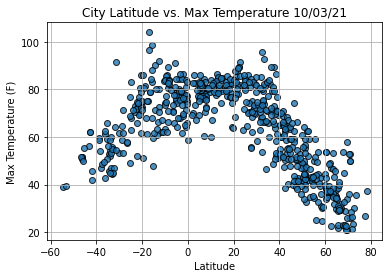

In [92]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

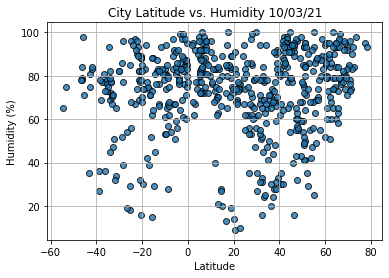

In [93]:
# Build the scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

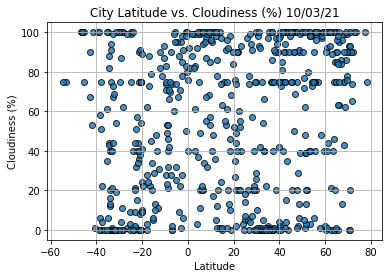

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

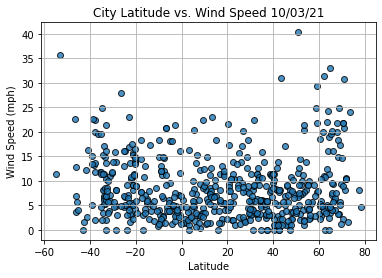

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [54]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [55]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dharchula,IN,2021-10-03 18:13:55,29.8500,80.5333,67.12,91,26,3.02
4,Dikson,RU,2021-10-03 18:13:47,73.5069,80.5464,34.48,98,100,23.98
6,Kyzyl-Suu,KG,2021-10-03 18:18:29,42.3414,78.0056,44.65,63,94,2.80
9,Neryungri,RU,2021-10-03 18:18:29,56.6709,124.6491,28.80,86,100,5.26
11,Ribeira Grande,PT,2021-10-03 18:18:30,38.5167,-28.7000,75.60,78,20,11.50


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

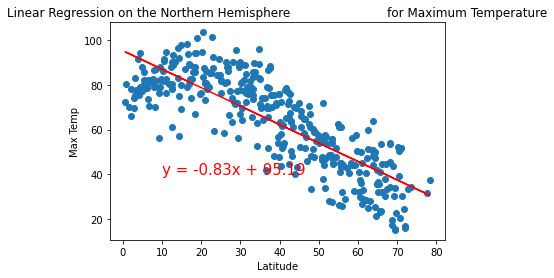

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

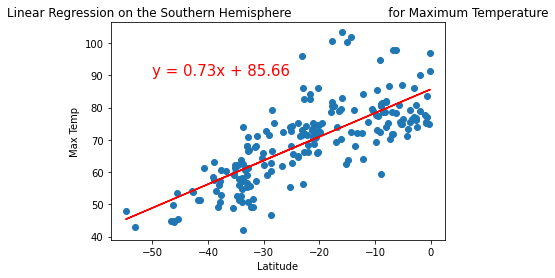

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

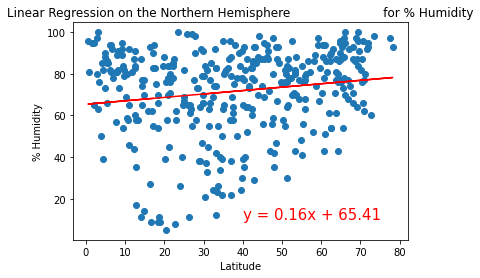

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for % Humidity', '% Humidity',(40,10))

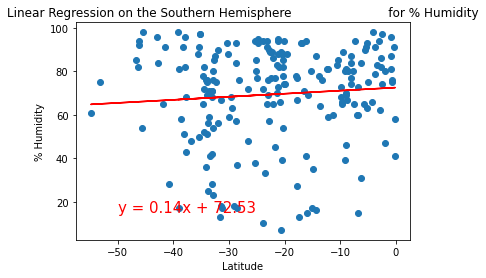

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

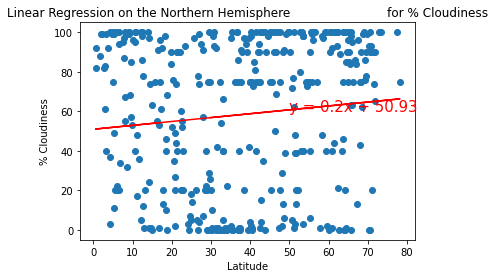

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,60))

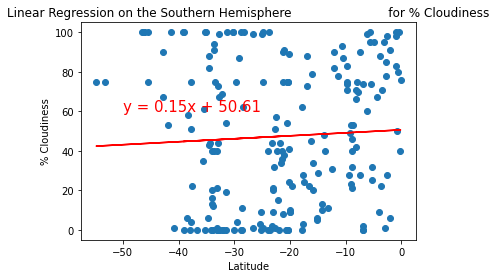

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

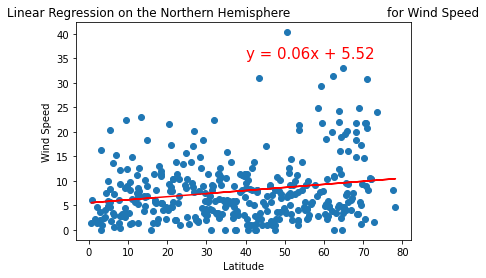

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

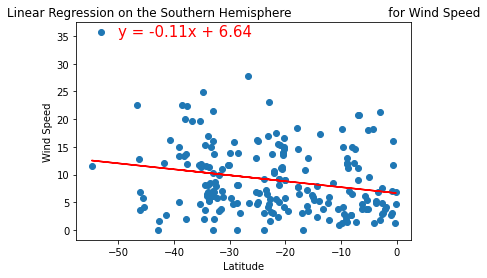

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))